In [1]:
ls

CSV_emo_bertlin_alg1.csv      model_save_feature/
CSV_essay_bertlin_alg1.ipynb  new_predictions.npy
Smallest_k.ipynb              old_predictions.npy
Smallest_k.py                 run_retrain.sh
Use_approK.ipynb              run_tagger.sh
__pycache__/                  save_feature.py
appro_ks.npy                  save_feature.sh
appro_ks_IP.npy               test_feature_save.npy
bert_util.py                  test_label_save.npy
essay_data/                   train_feature_save.npy
essay_dev.tsv                 train_label_save.npy
essay_train.tsv


In [1]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions.npy",  allow_pickle=True)
app_k = np.load("appro_ks_IP.npy", allow_pickle=True)
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
pred = np.load("old_predictions.npy", allow_pickle=True)
np.sum([new_pred_k[i] != None for i in range(new_pred_k.shape[0])])

831

In [3]:
np.mean([i for i in app_k if i != None])

523.791817087846

In [4]:
new_pred_k.shape[0]

1003

In [5]:
valid_new_pred_k = [new_pred_k[i] for i in range(new_pred_k.shape[0]) if new_pred_k[i] != None]

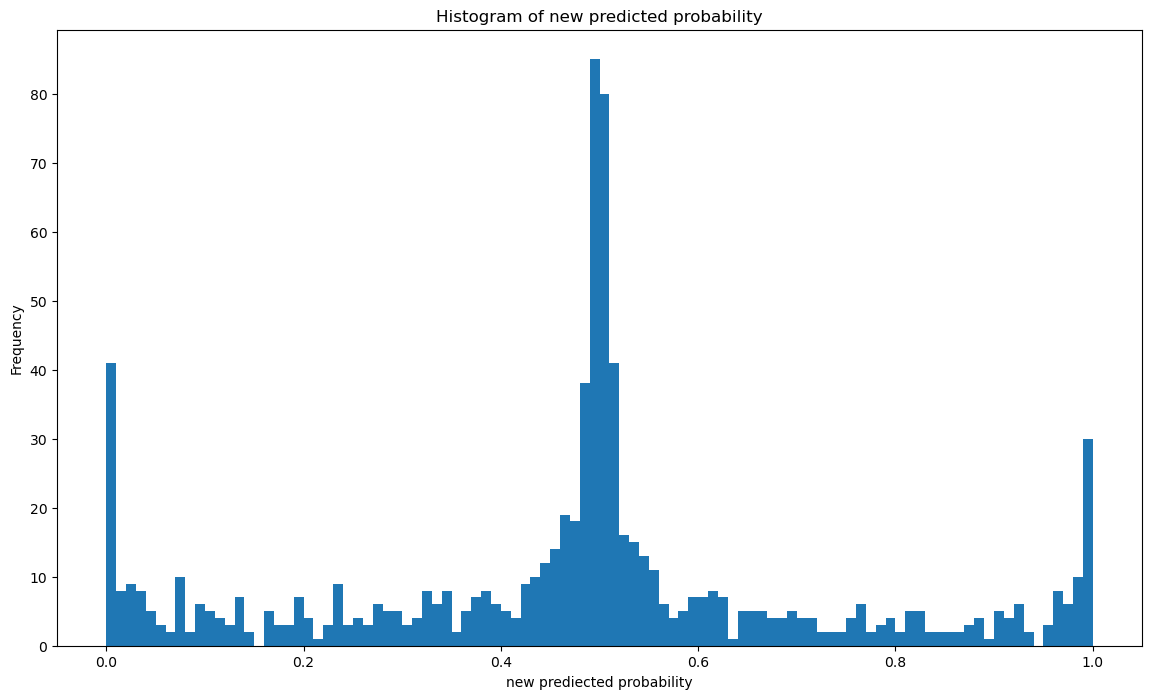

In [6]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(valid_new_pred_k, bins=100)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

# How many of them is None

In [7]:
np.sum([app_k[i] != None for i in range(new_pred_k.shape[0])])

831

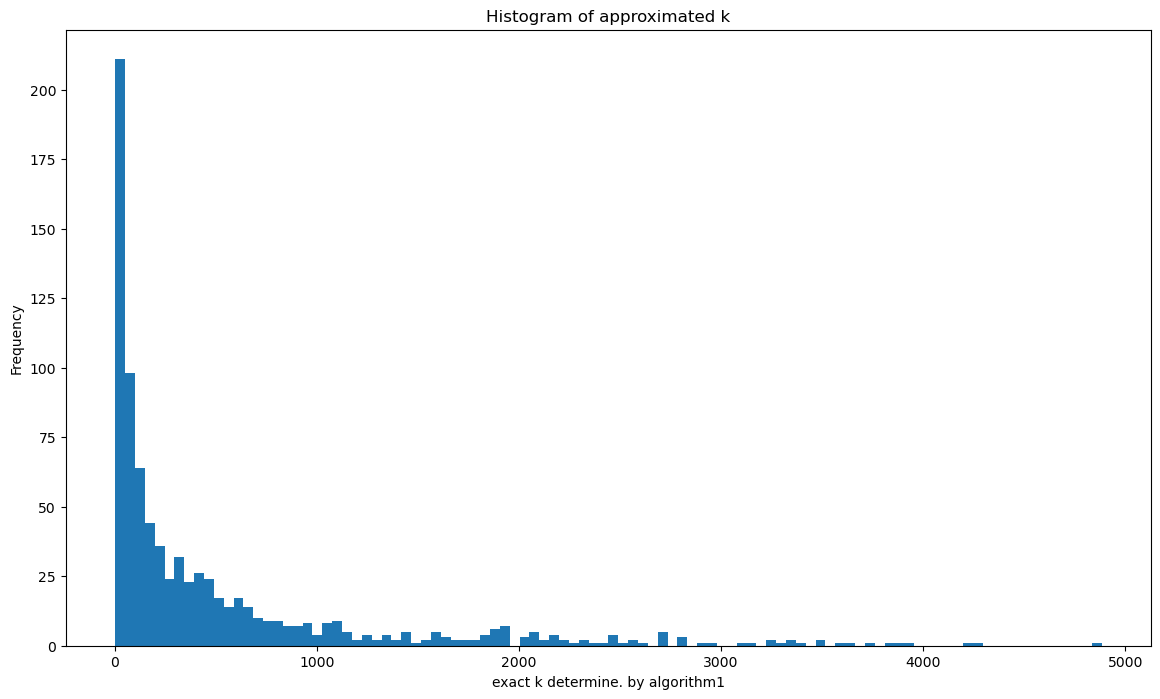

In [8]:
app_k_nonon=[app_k[i] for i in range(new_pred_k.shape[0]) if app_k[i] != None]

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=100)
plt.xlabel("exact k determine. by algorithm1")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

# For those are not None, how is the flip

In [9]:
flips = np.zeros((new_pred_k.shape[0], 1))
diff = np.zeros((new_pred_k.shape[0], 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(new_pred_k.shape[0]):
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

old 0.5624831100601705
new 0.5063723399202599
appro k 19
flip label [0.]

old 0.8976778662795729
new 0.0028473884459401058
appro k 2704
flip label [1.]

old 0.2011751766845104
new 0.7328363751404937
appro k 452
flip label [1.]

old 0.18740615359977503
new 0.782869030810448
appro k 865
flip label [1.]

old 0.5680367984491277
new 0.49569371763178516
appro k 31
flip label [1.]

old 0.4200817808833179
new 0.519005234938239
appro k 26
flip label [1.]

old 0.14343742198774176
new 0.9034653247549509
appro k 757
flip label [1.]

old 0.6944424609952986
new 0.44861459650299623
appro k 101
flip label [1.]

old 0.4317756619014297
new 0.49827209823302576
appro k 27
flip label [0.]

old 0.8182195323207755
new 0.23454963085631556
appro k 466
flip label [1.]

old 0.22223056474411623
new 0.666508711670562
appro k 230
flip label [1.]

old 0.2208326397645789
new 0.6739930632868235
appro k 315
flip label [1.]

old 0.736369013889341
new 0.3783340992145837
appro k 282
flip label [1.]

old 0.8661732258024235

In [10]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(new_pred_k.shape[0])])
num_flip

778

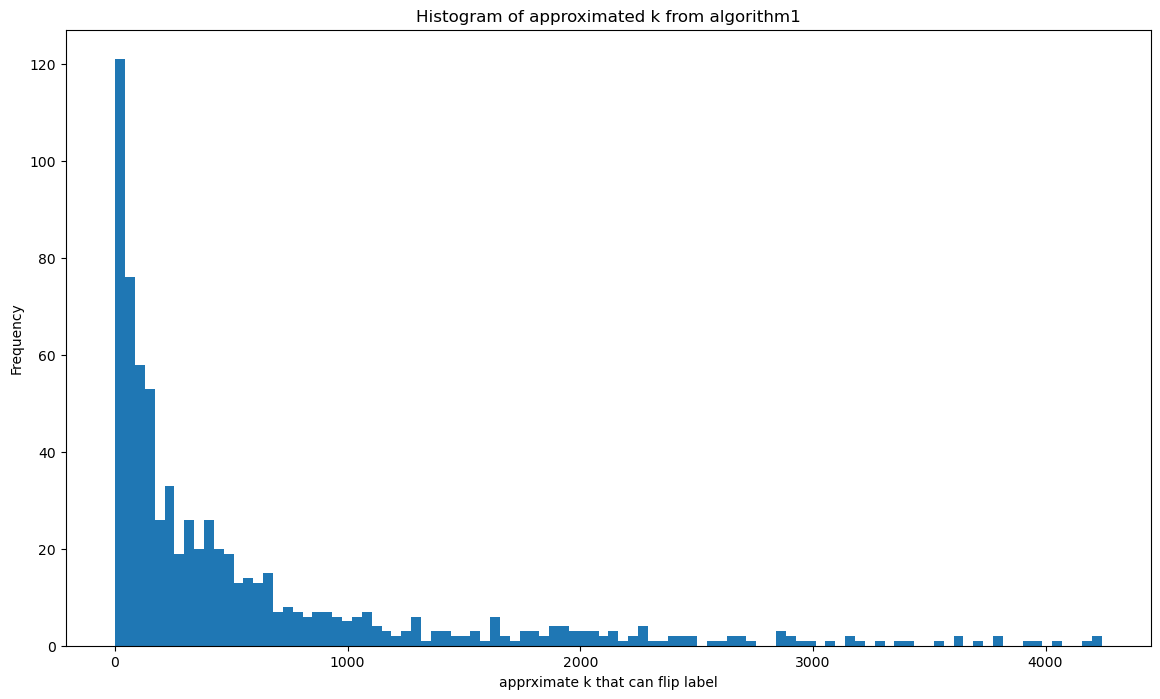

In [52]:

flip_idx = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1 ]
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [53]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(new_pred_k.shape[0])])
num_noflip

93

In [54]:
num_nok = np.sum([flips[i] == 2 for i in range(new_pred_k.shape[0])])
num_nok

172

In [55]:
# diff for those flip the lable
diff1=[diff[i] for i in range(new_pred_k.shape[0]) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.3150387388690873, 0.029328627296851914)

In [56]:
# diff for those cannot flip the lable
diff0=[diff[i] for i in range(new_pred_k.shape[0]) if flips[i] == 0]
np.mean(np.abs(diff0)), np.var(np.abs(diff0))

(0.07023449299067569, 0.0038218108863675654)

In [57]:
index1 = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1]

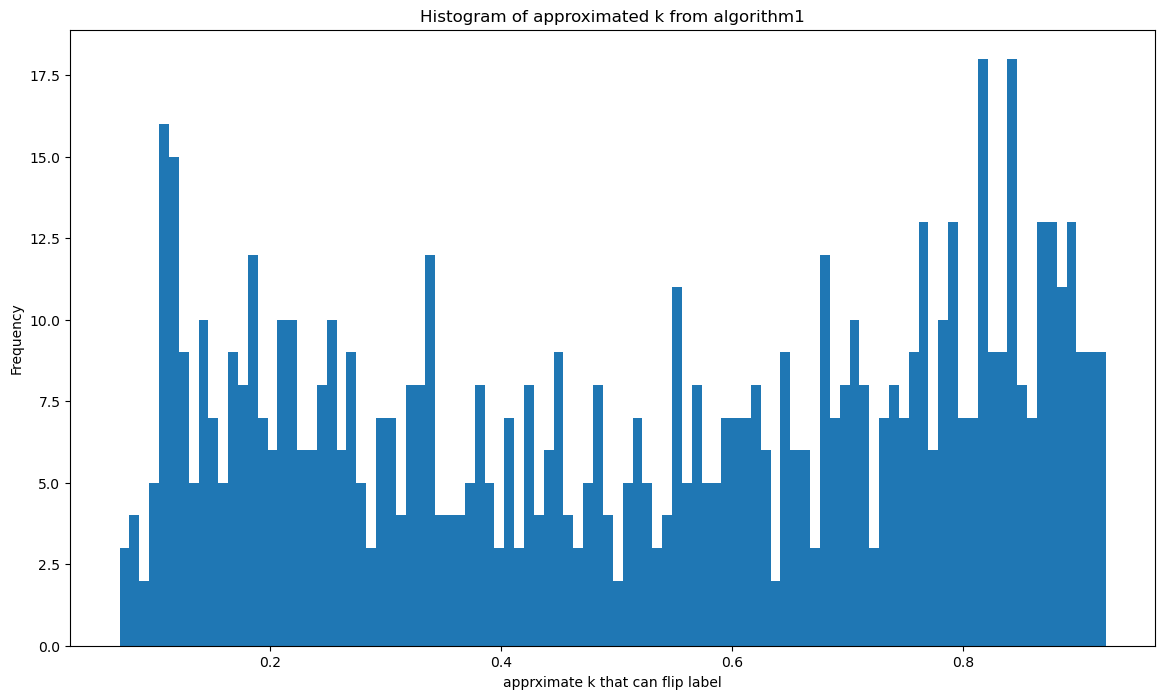

In [58]:

# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(pred[index1], bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [59]:
index10 = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1 or 0]

In [21]:
np.array(index10)

array([   0,    2,    4,    5,    7,    8,    9,   10,   11,   12,   13,
         14,   15,   16,   17,   18,   20,   21,   22,   23,   25,   27,
         31,   35,   36,   37,   39,   40,   42,   43,   44,   46,   48,
         50,   52,   53,   55,   56,   57,   58,   61,   63,   66,   71,
         72,   76,   78,   80,   81,   82,   83,   84,   85,   86,   87,
         92,   93,   96,   98,   99,  100,  102,  106,  109,  113,  114,
        115,  116,  117,  118,  120,  122,  124,  126,  127,  129,  132,
        133,  136,  137,  138,  140,  141,  142,  144,  145,  147,  148,
        150,  152,  153,  154,  157,  158,  160,  161,  162,  163,  165,
        167,  168,  169,  171,  173,  174,  176,  177,  178,  179,  180,
        181,  182,  183,  184,  186,  187,  188,  189,  191,  192,  193,
        194,  196,  197,  199,  201,  202,  205,  206,  208,  210,  213,
        214,  216,  217,  218,  219,  223,  225,  227,  228,  230,  231,
        233,  235,  236,  238,  246,  248,  251,  2

# not always underestimate?

# exact k is smaller

# order list

In [3]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_SST/IF_lr_fix'